# Principal Component Analysis in Linear Algebra for AI/ML

## Introduction and Relevance
**Definition**: Principal Component Analysis (PCA) is a dimensionality reduction technique that projects high-dimensional data onto orthogonal axes (principal components) to maximize variance, used in AI/ML for feature extraction, visualization, and noise reduction.

**Mathematical Definition**:
- For dataset $\mathbf{X} \in \mathbb{R}^{m \times n}$ ($m$ samples, $n$ features):
  1. **Center Data**: $\mathbf{X}_{\text{centered}} = \mathbf{X} - \bar{\mathbf{X}}$, where $\bar{\mathbf{X}}$ is the mean vector.
  2. **Covariance Matrix**: $\mathbf{C} = \frac{1}{m-1} \mathbf{X}_{\text{centered}}^T \mathbf{X}_{\text{centered}}$.
  3. **Eigenvalue Decomposition**: Find eigenvalues $\lambda_1 \geq \dots \geq \lambda_n \geq 0$ and eigenvectors $\mathbf{v}_1, \dots, \mathbf{v}_n$ of $\mathbf{C}$. Eigenvectors are principal components; eigenvalues represent variance.
  4. **Projection**: Select top $k$ eigenvectors ($\mathbf{V}_k$) and project: $\mathbf{Z} = \mathbf{X}_{\text{centered}} \mathbf{V}_k$, where $\mathbf{Z} \in \mathbb{R}^{m \times k}$.
- **SVD Alternative**: For $\mathbf{X}_{\text{centered}} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$, columns of $\mathbf{V}$ are principal components, and $\lambda_i = \frac{\sigma_i^2}{m-1}$.

**Geometric Interpretation**: PCA rotates data to align with axes of maximum variance, capturing key patterns.

**Examples**:
- Projects 2D data onto a line (first principal component).
- Reduces high-dimensional image data for visualization.

**Relevance in Mathematics**:
- **Variance Maximization**: Identifies directions of maximum data spread.
- **Orthogonal Transformations**: Uses orthonormal bases.
- **Matrix Approximation**: Provides low-rank approximations.

**Relevance in AI/ML**:
- **Dimensionality Reduction**: Reduces features, improving efficiency.
- **Decorrelation**: Creates uncorrelated features.
- **Visualization**: Projects data to 2D/3D.
- **Noise Reduction**: Filters low-variance components.

**Applications**:
- Dimensionality reduction (e.g., genomic data).
- Visualization (e.g., customer segmentation).
- Image compression, denoising, feature extraction, anomaly detection.

## Core Concepts

### 2.1 Principal Components
**Definition**: Eigenvectors of the covariance matrix $\mathbf{C}$, representing orthogonal directions of maximum variance.

**Explanation**: Principal components are linear combinations of features, with the first capturing the most variance, the second (orthogonal) the next most, etc.

**Properties**:
- **Orthogonality**: $\mathbf{v}_i \cdot \mathbf{v}_j = 0$ for $i \neq j$.
- **Normalization**: $\|\mathbf{v}_i\|_2 = 1$.
- **Variance**: Eigenvalue $\lambda_i$ indicates variance captured.

**Why Necessary**: Provides uncorrelated features and simplifies analysis.

**ML Use-Case**: Feature extraction for classification.

In [1]:
# Principal Components
import numpy as np

# Sample data
X = np.array([[1, 2], [3, 4], [5, 6]])
X_centered = X - np.mean(X, axis=0)
C = np.cov(X_centered.T)
eigenvalues, eigenvectors = np.linalg.eigh(C)

print('Principal components:\n', eigenvectors.round(2))
print('Variances (eigenvalues):', eigenvalues.round(2))

Principal components:
 [[-0.71  0.71]
 [ 0.71  0.71]]
Variances (eigenvalues): [0. 8.]


### 2.2 Variance Explained and Dimensionality Reduction
**Definition**: Proportion of variance explained: $\frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^n \lambda_i}$.

**Explanation**: Selects top $k$ components to retain most variance, reducing dimensionality.

**Properties**:
- **Maximizes Variance**: Ensures optimal subspace.
- **Cumulative Variance**: Indicates information retained.

**Why Necessary**: Reduces complexity, removes noise.

**ML Use-Case**: Preprocessing for faster training.

In [2]:
# Variance Explained
total_variance = np.sum(eigenvalues)
variance_explained = eigenvalues / total_variance
print('Variance explained per component:', variance_explained.round(2))
print('Cumulative variance explained:', np.cumsum(variance_explained).round(2))

Variance explained per component: [0. 1.]
Cumulative variance explained: [0. 1.]


### 2.3 SVD and PCA
**Definition**: SVD of $\mathbf{X}_{\text{centered}} = \mathbf{U} \mathbf{\Sigma} \mathbf{V}^T$ gives principal components in $\mathbf{V}$ and variances via $\lambda_i = \frac{\sigma_i^2}{m-1}$.

**Explanation**: SVD is efficient and stable for PCA, avoiding direct covariance computation.

**Why Necessary**: Handles large or ill-conditioned datasets.

**ML Use-Case**: PCA on high-dimensional image data.

In [3]:
# PCA with SVD
U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
principal_components = Vt.T
projected_data = X_centered @ Vt.T[:, :1]

print('Principal components (SVD):\n', principal_components.round(2))
print('Projected data:\n', projected_data.round(2))

Principal components (SVD):
 [[ 0.71  0.71]
 [ 0.71 -0.71]]
Projected data:
 [[-2.83]
 [ 0.  ]
 [ 2.83]]


### 2.4 Reconstruction Error
**Definition**: Error = $\|\mathbf{X}_{\text{centered}} - \mathbf{X}_{\text{centered}} \mathbf{V}_k \mathbf{V}_k^T\|_F$.

**Explanation**: Measures information loss in dimensionality reduction.

**Why Necessary**: Guides selection of $k$ to balance accuracy and efficiency.

**ML Use-Case**: Denoising by discarding low-variance components.

In [4]:
# Reconstruction Error
k = 1
P = Vt.T[:, :k] @ Vt[:k]
X_reconstructed = X_centered @ P
error = np.linalg.norm(X_centered - X_reconstructed, 'fro')

print('Reconstruction error (Frobenius norm):', error.round(2))

Reconstruction error (Frobenius norm): 0.0


## Applications in AI/ML
- **Dimensionality Reduction**: Preprocessing for faster training.
- **Visualization**: 2D/3D plots of high-dimensional data.
- **Image Compression**: Reduces storage needs.
- **Denoising**: Removes low-variance noise.
- **Feature Extraction**: Creates uncorrelated features.
- **Anomaly Detection**: Identifies outliers via large errors.

## Practical ML Example: Linear Regression with PCA
**Explanation**: PCA reduces data dimensionality before linear regression, projecting features onto principal components to remove correlation and noise. The regression finds the best fit line by projecting the target vector $\mathbf{y}$ onto the column space of the reduced feature matrix $\mathbf{Z} = \mathbf{X}_{\text{centered}} \mathbf{V}_k$. The projected points lie on the best fit line, and residuals are orthogonal to the column space, minimizing the L2 norm.

**Derivation**:
- PCA: $\mathbf{Z} = \mathbf{X}_{\text{centered}} \mathbf{V}_k$, where $\mathbf{V}_k$ contains top $k$ principal components.
- Model: $y_i = \beta_0 + \sum_{j=1}^k \beta_j z_{ij} + \epsilon_i$, with $\mathbf{Z}_{\text{aug}} = [\mathbf{1}, \mathbf{Z}]$ (including intercept).
- Minimize $\|\mathbf{y} - \mathbf{Z}_{\text{aug}} \mathbf{\beta}\|_2^2$.
- Normal equations: $\mathbf{Z}_{\text{aug}}^T \mathbf{Z}_{\text{aug}} \mathbf{\beta} = \mathbf{Z}_{\text{aug}}^T \mathbf{y}$.
- Solution: $\mathbf{\beta} = (\mathbf{Z}_{\text{aug}}^T \mathbf{Z}_{\text{aug}})^{-1} \mathbf{Z}_{\text{aug}}^T \mathbf{y}$.
- Projection: $\mathbf{y}_{\text{proj}} = \mathbf{Z}_{\text{aug}} \mathbf{\beta}$.
- Residuals: $\mathbf{e} = \mathbf{y} - \mathbf{y}_{\text{proj}}$, with SSE = $\|\mathbf{e}\|_2^2$.

**Why Necessary**:
- PCA reduces feature dimensionality, improving efficiency and reducing overfitting.
- Projection minimizes L2 norm of residuals.

**Error Solutions**:
- Increase $k$ to capture more variance.
- Add features or use non-linear models.
- Remove outliers to reduce large residuals.

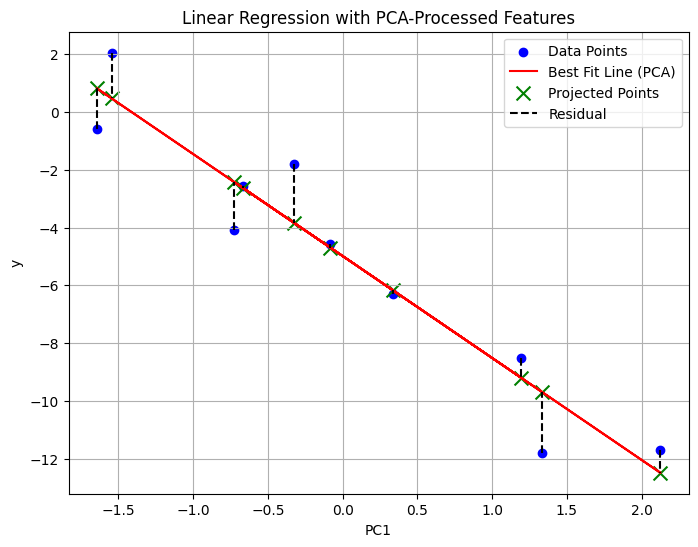

Coefficients: Intercept = -4.98, Slope = -3.53
Projected y: [ -9.69  -2.43 -12.49  -6.16   0.47   0.83  -4.69  -2.62  -9.2   -3.85]
Residuals: [-2.11 -1.65  0.79 -0.13  1.59 -1.41  0.14  0.05  0.68  2.06]
SSE: 17.05
L2 norm of residuals: 4.13


In [5]:
# Linear Regression with PCA
import numpy as np
import matplotlib.pyplot as plt

# Simulated data
np.random.seed(0)
X = np.random.multivariate_normal([0, 0], [[2, 1], [1, 2]], 10)
y = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.5, 10)  # Target

# PCA
X_centered = X - np.mean(X, axis=0)
U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
k = 1
Z = X_centered @ Vt.T[:, :k]  # Reduced features
Z_aug = np.vstack([np.ones(len(Z)), Z.T]).T  # Add intercept

# Linear regression
beta = np.linalg.inv(Z_aug.T @ Z_aug) @ Z_aug.T @ y
y_proj = Z_aug @ beta
errors = y - y_proj
sse = np.sum(errors**2)

# Visualize
plt.figure(figsize=(8, 6))
plt.scatter(Z, y, color='blue', label='Data Points')
plt.plot(Z, y_proj, color='red', label=f'Best Fit Line (PCA)')
plt.scatter(Z, y_proj, color='green', marker='x', s=100, label='Projected Points')
for i in range(len(Z)):
    plt.plot([Z[i], Z[i]], [y[i], y_proj[i]], 'k--', label='Residual' if i == 0 else None)
plt.xlabel('PC1')
plt.ylabel('y')
plt.grid(True)
plt.title('Linear Regression with PCA-Processed Features')
plt.legend()
plt.show()

print(f'Coefficients: Intercept = {beta[0]:.2f}, Slope = {beta[1]:.2f}')
print(f'Projected y:', y_proj.round(2))
print(f'Residuals:', errors.round(2))
print(f'SSE: {sse:.2f}')
print(f'L2 norm of residuals: {np.linalg.norm(errors):.2f}')

**Example Explanation**: This code applies PCA to reduce 2D data to 1D (first principal component), then performs linear regression on the reduced features. The visualization shows data points, the best fit line, projected points, and residuals. Errors are computed, with suggestions to increase $k$, add features, or remove outliers to reduce SSE.

## Summary
- **Key Concepts**: PCA projects data onto principal components to maximize variance, reducing dimensionality.
- **Mathematical Significance**: Maximizes variance, uses orthogonal transformations.
- **AI/ML Relevance**: Enhances efficiency, visualization, and robustness.
- **Next Steps**: Practice PCA and regression on datasets.

## Tips and Practice
- **Visualize**: Use Matplotlib or GeoGebra.
- **Practice Problems**:
  1. Compute PCA for a $3 \times 2$ dataset.
  2. Calculate variance explained for top components.
  3. Perform regression with PCA-preprocessed data.
- **Project Idea**: Apply PCA for visualization or compression.
- **Resources**: Strang’s “Linear Algebra,” 3Blue1Brown, MIT 18.06.

In [6]:
# Experimentation Zone
import numpy as np

X = np.array([[1, 2], [3, 4], [5, 6]])
X_centered = X - np.mean(X, axis=0)
U, Sigma, Vt = np.linalg.svd(X_centered, full_matrices=False)
Z = X_centered @ Vt.T[:, :1]

print('Reduced data:\n', Z.round(2))

Reduced data:
 [[-2.83]
 [ 0.  ]
 [ 2.83]]
